<a href="https://colab.research.google.com/github/Ismail-2022/Recall_EDA/blob/main/Recall_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [1]:
import numpy as np
original_data = np.random.exponential(size=1000)

In [ ]:
# for Box-Cox Transformation
from scipy import stats
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

In [ ]:
# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
# set seed for reproducibilitybb
np.random.seed(0)

In [ ]:
scaled_data = minmax_scaling(original_data, columns=[0])

Text(0.5, 1.0, 'Scaled Data')

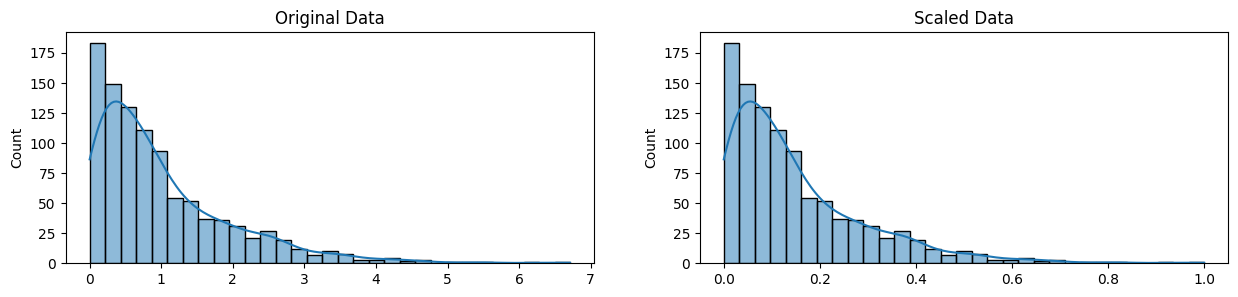

In [ ]:
fig , ax = plt.subplots(1,2,figsize=(15,3))
sns.histplot(original_data,ax=ax[0], kde=True,legend = False)
sns.histplot(scaled_data,ax = ax[1],kde=True,legend=False)
ax[0].set_title("Original Data")
ax[1].set_title("Scaled Data")

Normalizing data

In [ ]:
normalized_data = stats.boxcox(original_data)

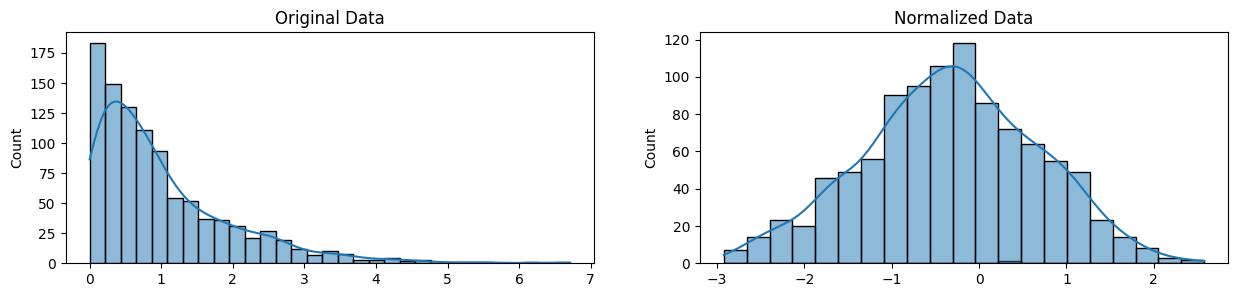

In [ ]:
fig , ax = plt.subplots(1,2,figsize=(15,3))

sns.histplot(original_data,ax=ax[0], kde=True,legend = False)
sns.histplot(normalized_data,ax = ax[1],kde=True, legend=False)
ax[0].set_title("Original Data")
ax[1].set_title("Normalized Data")
plt.show()

## Parsing Dates

You can download the dataset from kaggle
"https://www.kaggle.com/learn/data-cleaning"

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

landslides = pd.read_csv("catalog.csv")

np.random.seed(0)

In [ ]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [ ]:
print(landslides["date"].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [ ]:
landslides["date"].dtype

dtype('O')

In [ ]:
landslides["date_parsed"] = pd.to_datetime(landslides["date"],format="%m/%d/%y")
landslides["date_parsed"]

,date_parsed
0,2007-03-02
1,2007-03-22
2,2007-04-06
3,2007-04-14
4,2007-04-15
...,...
1688,2015-12-07
1689,2016-02-22
1690,2016-02-23
1691,2016-02-26


In [ ]:
day_of_month_landslides = landslides["date_parsed"].dt.day
day_of_month_landslides.head()

,date_parsed
0,2.0
1,22.0
2,6.0
3,14.0
4,15.0


/tmp/ipython-input-464728007.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day_of_month_landslides,bins=31,kde=False)


<Axes: xlabel='date_parsed'>

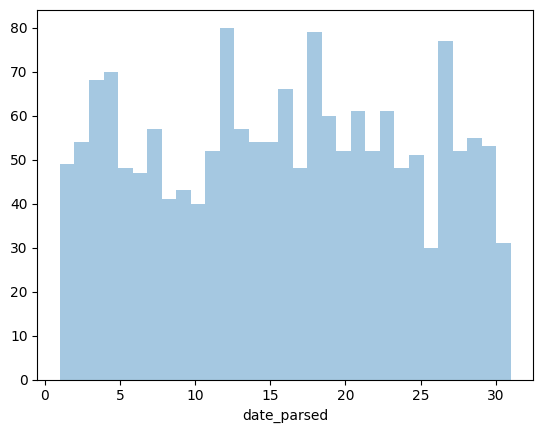

In [ ]:
sns.distplot(day_of_month_landslides,bins=31,kde=False)


In [ ]:
na_count = landslides['date'].isnull().sum()
print(f"Number of NA values in 'date' column: {na_count}")

Number of NA values in 'date' column: 3


## Student Marks

- Dataset source:https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [7]:
#making temporary directory to always store dataset
!mkdir Temporary

In [17]:
#!/bin/bash
!curl -L -o Temporary/students-performance-in-exams.zip https://www.kaggle.com/api/v1/datasets/download/spscientist/students-performance-in-exams

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  8907  100  8907    0     0  23339      0 --:--:-- --:--:-- --:--:-- 23339


In [20]:
!unzip -o Temporary/students-performance-in-exams.zip -d Temporary

Archive:  Temporary/students-performance-in-exams.zip
  inflating: Temporary/StudentsPerformance.csv  


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

student_df = pd.read_csv("Temporary/StudentsPerformance.csv")

In [ ]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [47]:
student_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [22]:
student_df.columns.unique()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [23]:
for col in student_df.columns:
    print(f"Number of unique values in {col}: {student_df[col].nunique()}")

Number of unique values in gender: 2
Number of unique values in race/ethnicity: 5
Number of unique values in parental level of education: 6
Number of unique values in lunch: 2
Number of unique values in test preparation course: 2
Number of unique values in math score: 81
Number of unique values in reading score: 72
Number of unique values in writing score: 77


In [24]:
for col in student_df.columns:
  if "score" not in col:
     print(f"Unique values in {col}: {student_df[col].unique()}")

Unique values in gender: ['female' 'male']
Unique values in race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Unique values in parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique values in lunch: ['standard' 'free/reduced']
Unique values in test preparation course: ['none' 'completed']


In [25]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
student_df[student_df['race/ethnicity']=="group B"]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
...,...,...,...,...,...,...,...,...
969,female,group B,bachelor's degree,standard,none,75,84,80
976,male,group B,some college,free/reduced,completed,60,62,60
980,female,group B,high school,free/reduced,none,8,24,23
982,male,group B,some high school,standard,completed,79,85,86


In [27]:
student_df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [28]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Vitualisation


<Axes: xlabel='writing score', ylabel='Count'>

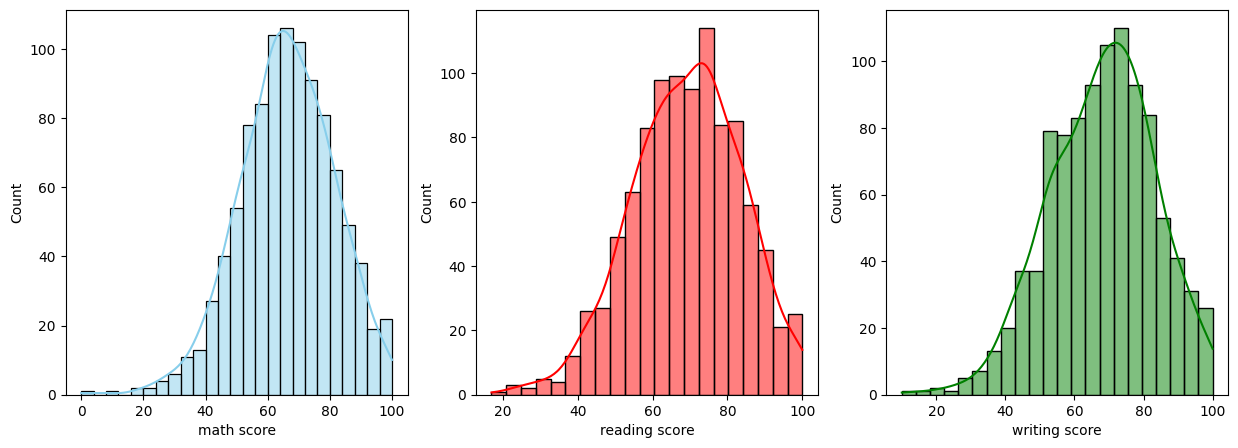

In [45]:
fig , axes = plt.subplots(1,3,figsize=(15,5))
sns.histplot(student_df['math score'],ax=axes[0],kde=True,color="skyblue")
sns.histplot(student_df['reading score'],ax=axes[1],kde=True,color="red")
sns.histplot(student_df['writing score'],ax=axes[2],kde=True,color="green")

In [48]:
group_math_score = student_df.groupby("race/ethnicity")['math score'].mean().reset_index()
group_math_score

,race/ethnicity,math score
0,group A,61.629213
1,group B,63.452632
2,group C,64.463950
3,group D,67.362595
4,group E,73.821429


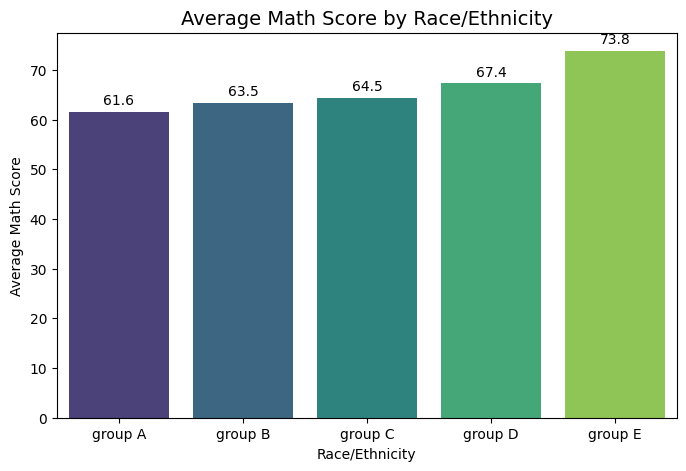

In [51]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x='race/ethnicity', y='math score', data=group_math_score, palette='viridis',hue="race/ethnicity")

# add value labels on each bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.1f'),  # show one decimal
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha = 'center', va = 'bottom',
        fontsize = 10, color='black', xytext=(0, 3),
        textcoords='offset points'
    )

plt.title('Average Math Score by Race/Ethnicity', fontsize=14)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Math Score')
plt.show()

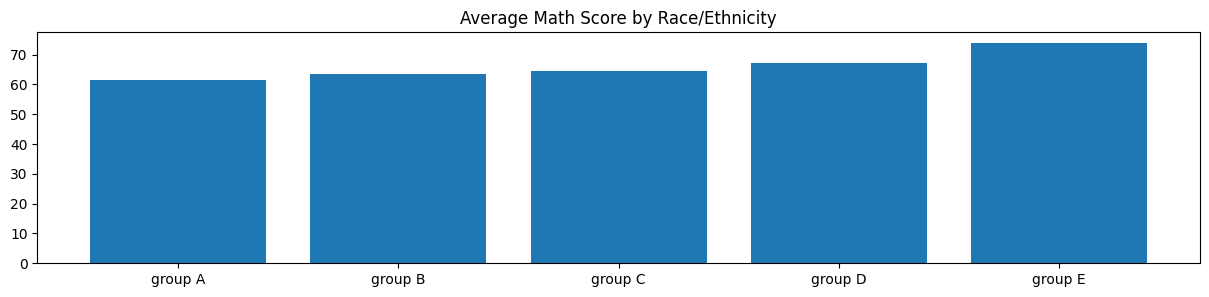

In [ ]:
#using plt
plt.figure(figsize=(15,3))
plt.bar(group_math_score["race/ethnicity"],group_math_score["math score"])
plt.xticks(rotation=0)
plt.title("Average Math Score by Race/Ethnicity")
plt.show()


In [ ]:
gender_group_math = student_df.groupby("gender")['math score'].mean().reset_index()
gender_group_math

,gender,math score
0,female,63.633205
1,male,68.728216


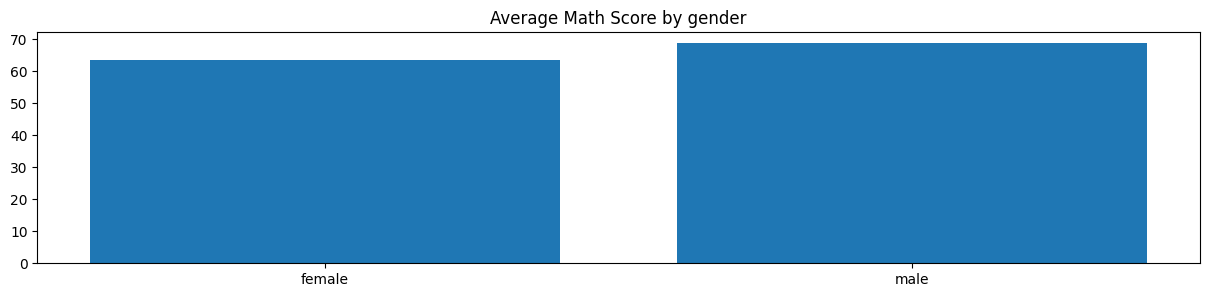

In [ ]:
plt.figure(figsize=(15,3))
ax = plt.bar(gender_group_math["gender"],gender_group_math["math score"])
plt.xticks(rotation=0)
plt.title("Average Math Score by gender")
plt.show()

In [62]:
student_melt_df = student_df.melt(id_vars=["gender"],value_vars=["math score","reading score","writing score"],var_name="subject",value_name="score")

In [63]:
student_melt_df

,gender,subject,score
0,female,math score,72
1,female,math score,69
2,female,math score,90
3,male,math score,47
4,male,math score,76
...,...,...,...
2995,female,writing score,95
2996,male,writing score,55
2997,female,writing score,65
2998,female,writing score,77


In [64]:
student_df.shape

(1000, 8)

<Axes: xlabel='subject', ylabel='score'>

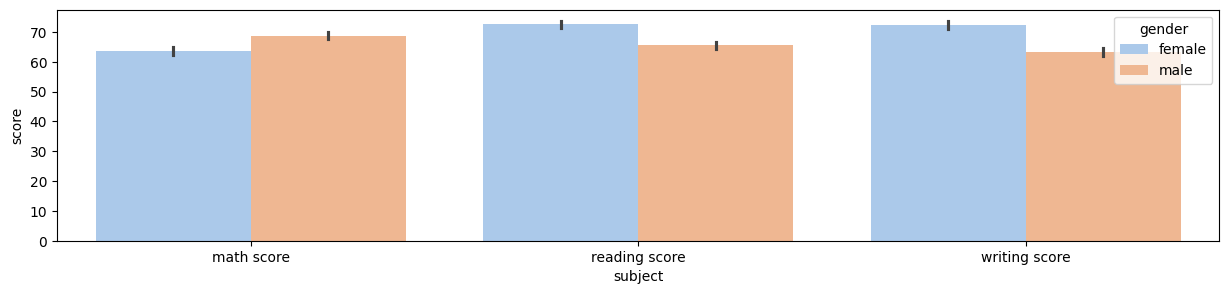

In [68]:
plt.figure(figsize=(15,3))
sns.barplot(x="subject",y="score",data=student_melt_df,hue="gender",palette="pastel")

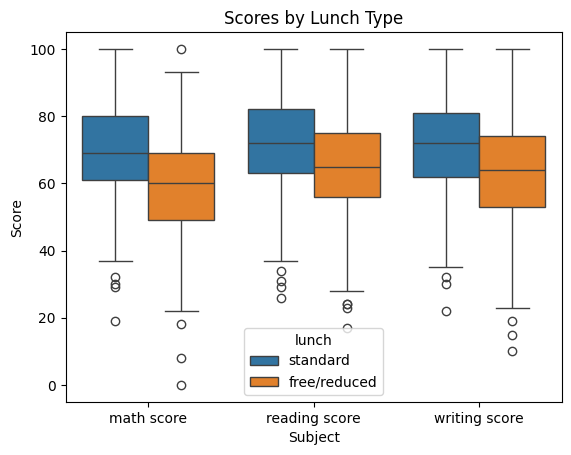

In [69]:
df_melt = student_df.melt(id_vars='lunch', value_vars=["math score","reading score","writing score"], var_name='Subject', value_name='Score')
sns.boxplot(data=df_melt, x='Subject', y='Score', hue='lunch')
plt.title('Scores by Lunch Type')
plt.show()

<Axes: >

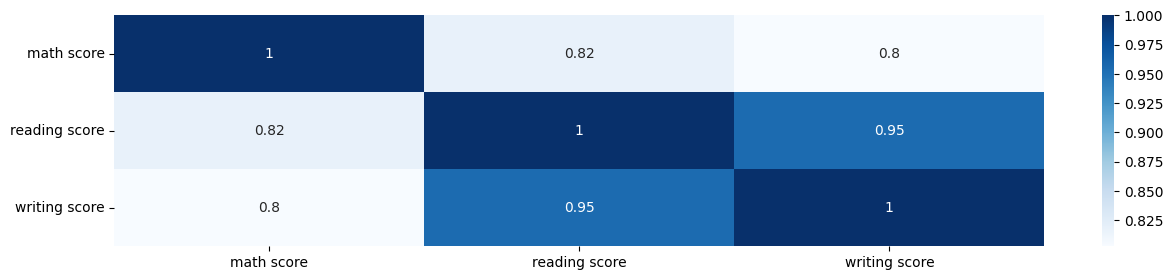

In [73]:
#correlation
plt.figure(figsize=(15,3))
sns.heatmap(student_df.corr(numeric_only=True),annot=True,cmap="Blues")

## Feature Engineering

In [83]:
# creating new col of avg score for student
student_df["avg score"] = student_df[['math score','writing score','reading score']].mean(axis=1).astype(int)
student_df[['math score','writing score','reading score','avg score']].head()

,math score,writing score,reading score,avg score
0,72,74,72,72
1,69,88,90,82
2,90,93,95,92
3,47,44,57,49
4,76,75,78,76


In [92]:
# adding another col - Grade
student_df["grade"] = pd.cut(student_df['avg score'],bins=[0,60,70,80,90,100],labels=['F','D','C','B','A'])

In [93]:
student_df[["avg score","grade"]].head()

,avg score,grade
0,72,C
1,82,B
2,92,A
3,49,F
4,76,C


In [94]:
student_df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'avg score', 'grade'],
      dtype='object')

In [98]:
student_df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72,C
1,female,group C,some college,standard,completed,69,90,88,82,B
2,female,group B,master's degree,standard,none,90,95,93,92,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49,F
4,male,group C,some college,standard,none,76,78,75,76,C


# Machine learning models(Scikit learn)


In [100]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_cols = ["gender","race/ethnicity","parental level of education","lunch","test preparation course" ]

for col in df_cols:
    student_df[col] = le.fit_transform(student_df[col])

In [101]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score,grade
0,0,1,1,1,1,72,72,74,72,C
1,0,2,4,1,0,69,90,88,82,B
2,0,1,3,1,1,90,95,93,92,A
3,1,0,0,0,1,47,57,44,49,F
4,1,2,4,1,1,76,78,75,76,C


In [102]:
# datasplit

from sklearn.model_selection import train_test_split

x = student_df.drop(["grade","avg score"],axis=1)
y = student_df["avg score"]

In [103]:
x   #input

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


In [104]:
y # actual value

,avg score
0,72
1,82
2,92
3,49
4,76
...,...
995,94
996,57
997,65
998,74


In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=111)

In [108]:
x_train.shape

(800, 8)

In [111]:
y_train.shape

(800,)

In [113]:
x_test.shape

(200, 8)

In [114]:
y_test.shape

(200,)

## Linear Regression

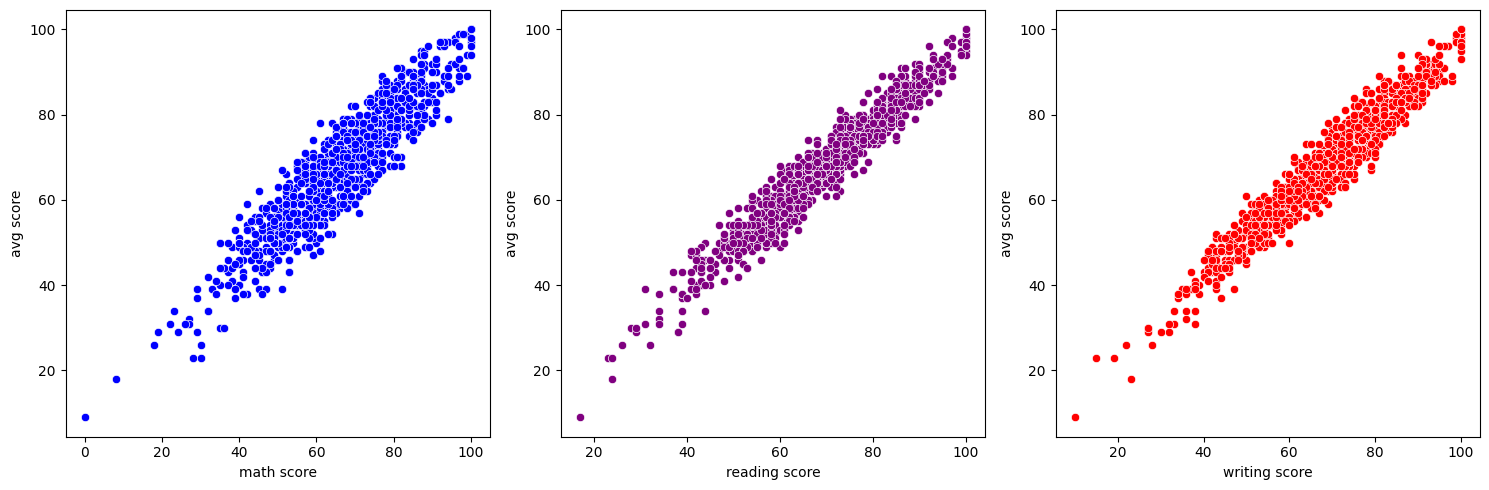

In [124]:
fig , axes = plt.subplots(1,3,figsize=(15,5))

sns.scatterplot(x="math score",y="avg score",data=student_df,ax=axes[0],color="blue")
sns.scatterplot(x="reading score",y="avg score",data=student_df,ax=axes[1],color="purple")
sns.scatterplot(x="writing score",y="avg score",data=student_df,ax=axes[2],color="red")
plt.tight_layout()
plt.show()

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

lr = LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

In [122]:
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print(f"R2 Score: {r2_score(y_test,y_pred)}")

Mean Squared Error: 0.06770801675592035
R2 Score: 0.9996550085326572


## Random Forest Regressor

In [126]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

rf = RandomForestRegressor()
rf.fit(x_train,y_train)

rf_y_pred = rf.predict(x_test)

print(f"Mean Squared Error: {mean_squared_error(y_test,rf_y_pred)}")
print(f"R2 Score: {r2_score(y_test,rf_y_pred)}")

Mean Squared Error: 1.1666515000000002
R2 Score: 0.9940555811239657


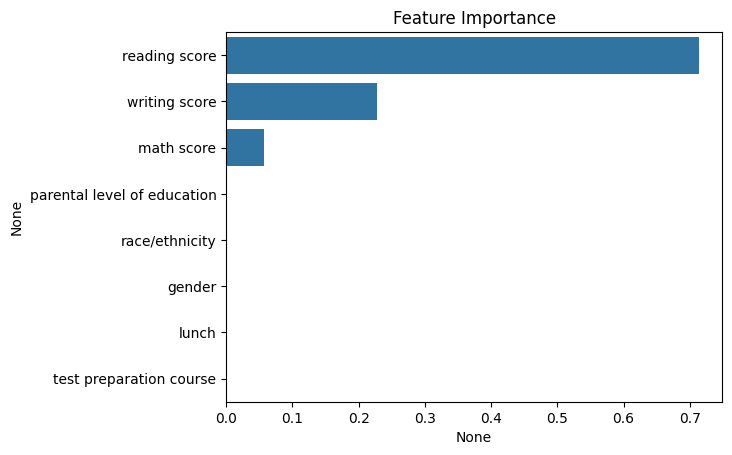

In [129]:
importance = pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)
sns.barplot(x=importance,y=importance.index)
plt.title("Feature Importance")
plt.show()

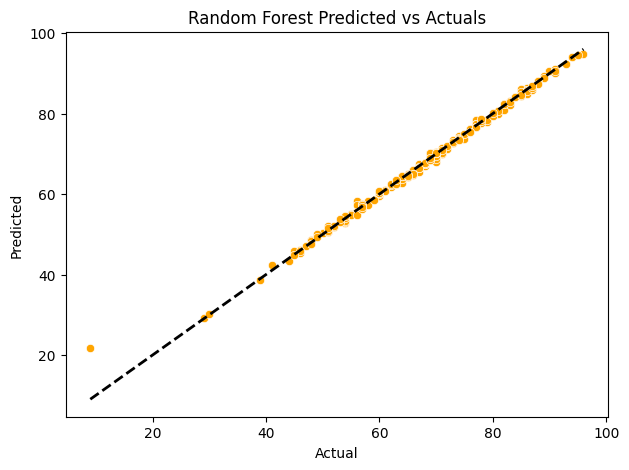

In [137]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=rf_y_pred, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
# sns.regplot(x=y_test, y=rf_y_pred, line_kws={'color':'red'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Predicted vs Actuals')
plt.show()

<Axes: xlabel='avg score'>

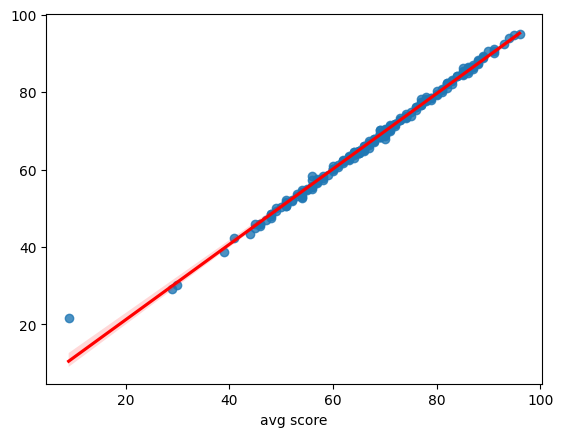

In [139]:
sns.regplot(x=y_test, y=rf_y_pred, line_kws={'color':'red'})

In [143]:
y_test[0:5]

,avg score
190,66
104,91
295,63
12,73
87,72


In [142]:
rf_y_pred[0:5]

array([65.27, 90.07, 62.61, 73.39, 71.75])